In [1]:
#from jupyterthemes import get_themes
#import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme
# uncomment and execute line to try a new theme
#set_nb_theme('solarizedl')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from numpy.linalg import inv

In [3]:
cov1 = (np.genfromtxt('DS2_Cov1.txt', delimiter=',',dtype=float))[:,:-1]
cov2 = (np.genfromtxt('DS2_Cov2.txt', delimiter=',',dtype=float))[:,:-1]
cov3 = (np.genfromtxt('DS2_Cov3.txt', delimiter=',',dtype=float))[:,:-1]

c1m1  = (np.genfromtxt('DS2_c1_m1.txt', delimiter=',',dtype=float))[:-1]
c1m2  = (np.genfromtxt('DS2_c1_m2.txt', delimiter=',',dtype=float))[:-1]
c1m3  = (np.genfromtxt('DS2_c1_m3.txt', delimiter=',',dtype=float))[:-1]
c2m1  = (np.genfromtxt('DS2_c2_m1.txt', delimiter=',',dtype=float))[:-1]
c2m2  = (np.genfromtxt('DS2_c2_m2.txt', delimiter=',',dtype=float))[:-1]
c2m3  = (np.genfromtxt('DS2_c2_m3.txt', delimiter=',',dtype=float))[:-1]

c1m1  =  np.array(c1m1).reshape(c1m1.shape[0],1)
c1m2  =  np.array(c1m2).reshape(c1m2.shape[0],1)
c1m3  =  np.array(c1m3).reshape(c1m3.shape[0],1)
c2m1  =  np.array(c2m1).reshape(c2m1.shape[0],1)
c2m2  =  np.array(c2m2).reshape(c2m2.shape[0],1)
c2m3  =  np.array(c2m3).reshape(c2m3.shape[0],1)


In [17]:
print cov1.shape
print cov2.shape
print cov3.shape
print c1m1.T
print c1m2.T
print c1m3.T
print c2m1.T
print c2m2.T
print c2m3.T


(20, 20)
(20, 20)
(20, 20)
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.]]
[[ 0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7
   0.7  0.7  0.7  0.7  0.7  0.7]]
[[ 1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3  1.3
   1.3  1.3  1.3  1.3  1.3  1.3]]
[[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
   2.  2.]]
[[ 1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7  1.7
   1.7  1.7  1.7  1.7  1.7  1.7]]
[[ 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6
   0.6  0.6  0.6  0.6  0.6  0.6]]


In [11]:
totalinstaces = 2000;
cat_cmp_num = np.random.multinomial(totalinstaces, [0.10, 0.42, 0.48])
print cat_cmp_num
data11 = np.random.multivariate_normal(c1m1.reshape(20), cov1, cat_cmp_num[0])
data12 = np.random.multivariate_normal(c1m2.reshape(20), cov2,cat_cmp_num[1] )
data13 = np.random.multivariate_normal(c1m3.reshape(20), cov3,cat_cmp_num[2])
data21 = np.random.multivariate_normal(c2m1.reshape(20), cov1,cat_cmp_num[0])
data22 = np.random.multivariate_normal(c2m2.reshape(20), cov2,cat_cmp_num[1])
data23 = np.random.multivariate_normal(c2m3.reshape(20), cov3,cat_cmp_num[2])

threshold = int(totalinstaces*0.3)
thresholdD = int(totalinstaces*0.7)
x1 = np.concatenate([data11,data12,data13])
x2 = np.concatenate([data21,data22,data23])
x1= x1[np.random.permutation(x1.shape[0])]
x2= x2[np.random.permutation(x2.shape[0])]

train  = np.concatenate([x1[threshold:],x2[threshold:]]);
trainY = np.array(np.ones(train.shape[0]))
trainY[(trainY.shape[0])/2:] = -1;

test   = np.concatenate([x1[:threshold],x2[:threshold]]);
testY = np.array(np.ones(threshold*2))
testY[threshold:] = -1;

targets = [1,-1]
print trainY
print testY.shape
print thresholdD

[ 190  799 1011]
[ 1.  1.  1. ..., -1. -1. -1.]
(1200,)
1400


## LDA

In [25]:
targets = np.unique(trainY)
N1 = trainY[trainY==targets[0]].shape[0]
N2 = trainY[trainY==targets[1]].shape[0]
N  = N1+N2

u1 = np.sum(train[trainY==targets[0]], axis=0)/N1
u2 = np.sum(train[trainY==targets[1]], axis=0)/N2

temp = train[thresholdD:];
S1   = np.dot((temp-u1).T,(temp-u1))/N1
temp = train[:thresholdD];
S2   = np.dot((temp-u2).T,(temp-u2))/N2
Sigma= (float(N1)/N)*S1 + (float(N2)/N)*S2

myX0 = np.random.multivariate_normal(u1.reshape(20), Sigma, N1)
myX1 = np.random.multivariate_normal(u2.reshape(20), Sigma, N2)

w   =     np.dot(inv(Sigma),(u1-u2))
w0 = -0.5*np.dot(np.dot(u1,inv(Sigma)),u1) + 0.5*np.dot(np.dot(u2,inv(Sigma)),u2)

a       = np.dot(train,w) +w0
softmax = 1./ (1.+np.exp(-a))

result = softmax >0.5
result = (result-0.5)*2
compare = trainY == result

print "u1 is \n",u1
print "u2 is \n",u2
print "Sigma is \n", Sigma

u1 is 
[ 1.22134134  1.20901538  1.25394856  1.21971193  1.22796643  1.18397758
  1.22095479  1.22839335  1.1116205   1.29659131  1.23941468  1.25915974
  1.2347252   1.21382068  1.23451323  1.25785782  1.20007879  1.22414381
  1.29244115  1.16712295]
u2 is 
[ 1.08946194  1.02291736  0.98115355  1.02042408  1.00075081  1.08359003
  1.04731936  1.04654574  1.07285891  1.02290869  1.01177768  1.02761621
  0.99278151  1.01508673  1.00759585  1.06696424  1.03142792  1.07058538
  1.01445736  1.07068892]
Sigma is 
[[ 7.78374229  5.30692876  4.51079898  4.96366219  4.37378576  5.58183596
   5.8279646   5.6683629   4.5839495   5.2768642   5.5122976   4.94775318
   4.98567385  6.00187579  5.43143903  5.70494169  5.30719583  5.60408377
   5.56457357  5.79625895]
 [ 5.30692876  7.14976454  4.73092452  5.14265781  5.05008375  6.01081324
   6.39924216  5.39847152  4.52702488  4.94058918  4.74338365  4.8807143
   4.8495857   5.95355824  5.59910838  5.96655492  5.04563559  5.15902161
   6.09594691  5

### Computing error of training set

In [26]:
TP = np.count_nonzero((result==1) & (trainY==1))
TN = np.count_nonzero((result==-1) & (trainY==-1))
FP = np.count_nonzero((result==1) & (trainY==-1))
FN = np.count_nonzero((result==-1) & (trainY==1))

confusionMatrix = np.array([[TP,FP],[FN,TN]])
print "Confusion Matrix is: \n" , confusionMatrix ,'\n'

Accuracy  = float((TP+TN))/(TP+TN + FP+FN)
Percision = float(TP) / (TP+FP) 
Recall    = float(TP) / (TP+FN) 
F1        = Percision*Recall / (Percision +Recall)
print "Accuracy is:\n", Accuracy ,'\n'
print "Percision is:\n", Percision ,'\n'
print "Recall is:\n", Recall ,'\n'
print "F1 is:\n", F1 ,'\n'




Confusion Matrix is: 
[[632 779]
 [768 621]] 

Accuracy is:
0.4475 

Percision is:
0.447909284196 

Recall is:
0.451428571429 

F1 is:
0.224831020989 



## Evaluating on testset

In [50]:
a       = np.dot(test,w) +w0
softmax = 1./ (1.+np.exp(-a))

result = softmax >0.5
result = (result-0.5)*2
compare = testY == result



TP = np.count_nonzero((result==1) & (testY==1))
TN = np.count_nonzero((result==-1) & (testY==-1))
FP = np.count_nonzero((result==1) & (testY==-1))
FN = np.count_nonzero((result==-1) & (testY==1))

confusionMatrix = np.array([[TP,FP],[FN,TN]])
print "Confusion Matrix is: \n" , confusionMatrix ,'\n'

Accuracy  = float((TP+TN))/(TP+TN + FP+FN)
Percision = float(TP) / (TP+FP) 
Recall    = float(TP) / (TP+FN) 
F1        = Percision*Recall / (Percision +Recall)
print "Accuracy is:\n", Accuracy ,'\n'
print "Percision is:\n", Percision ,'\n'
print "Recall is:\n", Recall ,'\n'
print "F1 is:\n", F1 ,'\n'

Confusion Matrix is: 
[[299 298]
 [301 302]] 

Accuracy is:
0.500833333333 

Percision is:
0.500837520938 

Recall is:
0.498333333333 

F1 is:
0.249791144528 



## Writing DS1.csv

In [27]:
print test.shape
print testY.reshape(testY.shape[0],1).shape

DS2 = np.concatenate((test, testY.reshape(testY.shape[0],1)), axis=1)
np.savetxt('DS2.csv', DS2, delimiter=',')

(1200, 20)
(1200, 1)


## W and W0

In [28]:
print "w0 is: \n", w0
print
print "w is \n", w

w0 is: 
-0.0763385395598

w is 
[-0.05700716 -0.00404328  0.05853102 -0.01286917  0.03771919  0.01563895
 -0.0543444   0.04700332 -0.07731171  0.07378445  0.07728917  0.01308435
  0.04122218  0.00027036 -0.00748083  0.00349172  0.00119578 -0.00110821
 -0.01307213 -0.07670895]


## KNN

In [29]:
def myKNN(K):
    dist       = np.zeros([test.shape[0],K],dtype=float)
    indexArr   = np.zeros([test.shape[0],K],dtype=int)
    resultKNN  = np.zeros([test.shape[0],1],dtype=int)
    targets    = [1,-1]
    for i in range(test.shape[0]):
        eucludian    = np.sqrt(np.sum((test[i]-train)**2,axis=1))
        indexArr[i]  = eucludian.argsort(axis=0)[:K];
        dist[i]      = eucludian[indexArr[i]]
        majority     = np.count_nonzero(trainY[indexArr[i]]==1)
        resultKNN[i] = targets[(2*majority -K )>0]
    return resultKNN

In [30]:
def computeAccuracy(resultKNN,testY,showResults):
    testY = testY.reshape(testY.shape[0],1);
    TP = np.count_nonzero((resultKNN==1)  & (testY== 1))
    TN = np.count_nonzero((resultKNN==-1) & (testY==-1))
    FP = np.count_nonzero((resultKNN==1)  & (testY==-1))
    FN = np.count_nonzero((resultKNN==-1) & (testY== 1))

    confusionMatrix = np.array([[TP,FP],[FN,TN]])
    

    Accuracy  = float((TP+TN))/(TP+TN + FP+FN)*100
    Percision = float(TP) / (TP+FP) *100
    Recall    = float(TP) / (TP+FN) *100
    F1        = Percision*Recall / (Percision +Recall)
    if showResults:
        print "Confusion Matrix is: \n" , confusionMatrix 
        print "Accuracy is:\t", Accuracy 
        print "Percision is:\t", Percision 
        print "Recall is:\t", Recall 
        print "F1 score is:\t", F1
    return [confusionMatrix,Accuracy,Percision,Recall,F1]

In [38]:
Ks = 500

scale = 2
Accuracy        = np.zeros(Ks,dtype=float)
Percision       = np.zeros(Ks,dtype=float)
Recall          = np.zeros(Ks,dtype=float)
F1              = np.zeros(Ks,dtype=float)
confusionMatrix = np.zeros((Ks,2,2),dtype=float)

for i in range(Ks):
    print "...............  K=%d  ..............."%(i+scale)
    resultKNN = myKNN(i+scale)
    confusionMatrix[i],Accuracy[i],Percision[i],Recall[i],F1[i]= computeAccuracy(resultKNN,testY,False)

...............  K=2  ...............
...............  K=3  ...............
...............  K=4  ...............
...............  K=5  ...............
...............  K=6  ...............
...............  K=7  ...............
...............  K=8  ...............
...............  K=9  ...............
...............  K=10  ...............
...............  K=11  ...............
...............  K=12  ...............
...............  K=13  ...............
...............  K=14  ...............
...............  K=15  ...............
...............  K=16  ...............
...............  K=17  ...............
...............  K=18  ...............
...............  K=19  ...............
...............  K=20  ...............
...............  K=21  ...............
...............  K=22  ...............
...............  K=23  ...............
...............  K=24  ...............
...............  K=25  ...............
...............  K=26  ...............
...............  K=27  ..........

In [39]:
maxIndx = np.argmax(Accuracy);
print "best performence among the tested Ks is fo %d"% (maxIndx+scale)
print "Confusion Matrix is: \n" , confusionMatrix[maxIndx] 
print "Accuracy is:\t", Accuracy[maxIndx] 
print "Percision is:\t", Percision[maxIndx] 
print "Recall is:\t", Recall[maxIndx] 
print "F1 score is:\t", F1[maxIndx]

best performence among the tested Ks is fo 194
Confusion Matrix is: 
[[ 343.  331.]
 [ 257.  269.]]
Accuracy is:	51.0
Percision is:	50.8902077151
Recall is:	57.1666666667
F1 score is:	26.9230769231


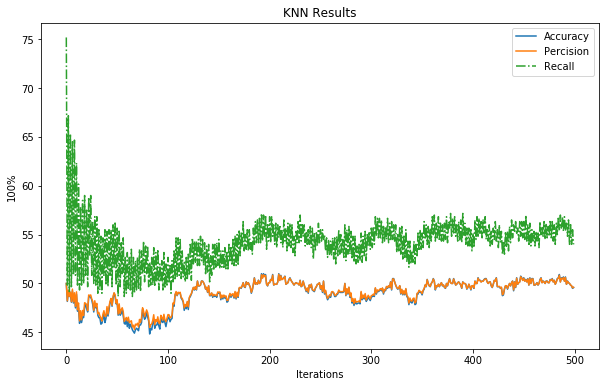

In [47]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_title('KNN Results')
plt.plot(range(Ks),Accuracy,  label="Accuracy")
plt.plot(range(Ks),Percision,'-', label="Percision")
plt.plot(range(Ks),Recall,'-.',    label="Recall")
#plt.plot(range(Ks*scale),F1, label="F1 Score")
ax.set_xlabel('Iterations')
ax.set_ylabel('100%')
ax.legend(loc='best')
plt.show()